## Latency compparison with batch

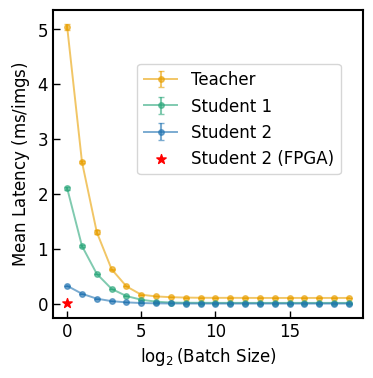

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the CSV files
student1 = pd.read_csv("latency_results_studen1_final.csv")
student2 = pd.read_csv("latency_results_studen2_final.csv")
teacher = pd.read_csv("latency_results_teacher_final.csv")

# Prepare data
batch_sizes_student1 = student1["Batch Size"]
batch_sizes_student2 = student2["Batch Size"]
batch_sizes_teacher = teacher["Batch Size"]

mean_latency_student1 = student1["Mean Latency per Image (ms)"]
mean_latency_student2 = student2["Mean Latency per Image (ms)"]
mean_latency_teacher = teacher["Mean Latency per Image (ms)"]

std_latency_student1 = student1["Std Latency per Image (ms)"]
std_latency_student2 = student2["Std Latency per Image (ms)"]
std_latency_teacher = teacher["Std Latency per Image (ms)"]

# Define colors
colors = ['#2ba77b', '#2274b2', '#e9a001']

font_size = 12
font = {'size': font_size}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 1.50

# FPGA-specific values
fpga_batch = 1
fpga_latency = 0.0145

# Create plot
f, ax = plt.subplots(figsize=(4, 4), dpi=100)

lw = 1.4
cap_size = 2
fmt = '-o'
markersize = 4
alpha = 0.6

# Plot data with error bars
ax.errorbar(np.log2(batch_sizes_teacher), mean_latency_teacher,
            yerr=std_latency_teacher, color=colors[2], label='Teacher',
            linewidth=lw, elinewidth=1.5, capsize=cap_size, marker='o', linestyle='-', markersize=markersize, alpha=alpha)


ax.errorbar(np.log2(batch_sizes_student1), mean_latency_student1,
            yerr=std_latency_student1, color=colors[0], label='Student 1',
            linewidth=lw, elinewidth=1.5, capsize=cap_size, marker='o', linestyle='-', markersize=markersize, alpha=alpha)

ax.errorbar(np.log2(batch_sizes_student2), mean_latency_student2,
            yerr=std_latency_student2, color=colors[1], label='Student 2',
            linewidth=lw, elinewidth=1.5, capsize=cap_size, marker='o', linestyle='-', markersize=markersize, alpha=alpha)


# Add FPGA-specific dot
fpga_handle = ax.scatter(np.log2(fpga_batch), fpga_latency, color='red', label='Student 2 (FPGA)', s=50, zorder=5, marker='*')

# Customize plot
# ax.set_xlabel(r"$\log_2(\text{Batch Size})$", fontsize=12)
# # ax.set_ylabel("Mean Latency ${(ms/image)}$", fontsize=12)
# # ax.set_ylabel(r"$\text{Mean Latency} \, (\mathrm{ms}/\mathrm{imgs})$", fontsize=12)
# ax.set_ylabel("Mean Latency (ms/image)", fontsize=12)
ax.set_xlabel(r"$\log_2(\mathrm{Batch\ Size})$", fontsize=12)
ax.set_ylabel(r"Mean Latency ($\mathrm{ms}/\mathrm{imgs}$)", fontsize=12)




# Get existing legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Reorder handles and labels to ensure Student 2 (FPGA) appears last
handles = [handles[1], handles[2], handles[3], handles[0]]  # Correct sequence
labels = [labels[1], labels[2], labels[3], labels[0]]  

# Position legend at the bottom with the desired order
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.6, .85), ncol=1, fontsize=font_size)

ax.tick_params(axis='both', length=5, width=1.0, direction='in')

# Save plot
image_name = "mean_latency_per_image_log_x_fpga"
plt.savefig(image_name + '.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.savefig(image_name + '.png', format='png', dpi=1200, bbox_inches='tight')

# Show plot
plt.show()

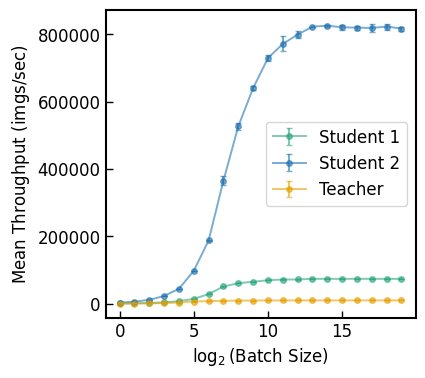

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the CSV files
student1 = pd.read_csv("latency_results_studen1_final.csv")
student2 = pd.read_csv("latency_results_studen2_final.csv")
teacher = pd.read_csv("latency_results_teacher_final.csv")

# Prepare data
batch_sizes_student1 = student1["Batch Size"]
batch_sizes_student2 = student2["Batch Size"]
batch_sizes_teacher = teacher["Batch Size"]

mean_latency_student1 = student1["Mean Throughput (imgs/sec)"]
mean_latency_student2 = student2["Mean Throughput (imgs/sec)"]
mean_latency_teacher = teacher["Mean Throughput (imgs/sec)"]

std_latency_student1 = student1["Std Throughput (imgs/sec)"]
std_latency_student2 = student2["Std Throughput (imgs/sec)"]
std_latency_teacher = teacher["Std Throughput (imgs/sec)"]

# Define colors
colors = ['#2ba77b', '#2274b2', '#e9a001']

font_size = 12
font = {'size': font_size}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 1.50

# Create plot
f, ax = plt.subplots(figsize=(4, 4), dpi=100)


# lw = 1
# cap_size = 2

# # Plot data with logarithmic x-axis
# ax.plot(np.log2(batch_sizes_student1), mean_latency_student1, color=colors[0], label='Student 1', linewidth=lw)
# ax.fill_between(np.log2(batch_sizes_student1), 
#                 mean_latency_student1 - std_latency_student1, 
#                 mean_latency_student1 + std_latency_student1, 
#                 color=colors[0], alpha=0.2)

# ax.plot(np.log2(batch_sizes_student2), mean_latency_student2, color=colors[1], label='Student 2', linewidth=lw)
# ax.fill_between(np.log2(batch_sizes_student2), 
#                 mean_latency_student2 - std_latency_student2, 
#                 mean_latency_student2 + std_latency_student2, 
#                 color=colors[1], alpha=0.2)

# ax.plot(np.log2(batch_sizes_teacher), mean_latency_teacher, color=colors[2], label='Teacher', linewidth=lw)
# ax.fill_between(np.log2(batch_sizes_teacher), 
#                 mean_latency_teacher - std_latency_teacher, 
#                 mean_latency_teacher + std_latency_teacher, 
#                 color=colors[2], alpha=0.2)
# lw = 1
# cap_size = 2
# ax.errorbar(np.log2(batch_sizes_student1), mean_latency_student1, 
#             yerr=std_latency_student1, color=colors[0], label='Student 1', fmt='--', linewidth=lw, elinewidth=1.5, capsize=cap_size)

# ax.errorbar(np.log2(batch_sizes_student2), mean_latency_student2, 
#             yerr=std_latency_student2, color=colors[1], label='Student 2', fmt='-', linewidth=lw, capsize=cap_size)

# ax.errorbar(np.log2(batch_sizes_teacher), mean_latency_teacher, 
#             yerr=std_latency_teacher, color=colors[2], label='Teacher', fmt='-', linewidth=lw, capsize=cap_size)


lw = 1.4
cap_size = 2
fmt='-o'
markersize = 4
alpha = 0.6

ax.errorbar(np.log2(batch_sizes_student1), mean_latency_student1, 
            yerr=std_latency_student1, color=colors[0], label='Student 1', 
            linewidth=lw, elinewidth=1.5, capsize=cap_size, marker='o', linestyle='-', markersize=markersize, alpha=alpha)

ax.errorbar(np.log2(batch_sizes_student2), mean_latency_student2, 
            yerr=std_latency_student2, color=colors[1], label='Student 2', 
            linewidth=lw, elinewidth=1.5, capsize=cap_size, marker='o', linestyle='-', markersize=markersize, alpha=alpha)

ax.errorbar(np.log2(batch_sizes_teacher), mean_latency_teacher, 
            yerr=std_latency_teacher, color=colors[2], label='Teacher', 
            linewidth=lw, elinewidth=1.5, capsize=cap_size, marker='o', linestyle='-', markersize=markersize, alpha=alpha)




# Customize plot
# ax.set_xlabel("Batch Size", fontsize=12)
# ax.set_ylabel("Mean Latency per Image (ms)", fontsize=12)
ax.set_xlabel(r"$\log_2(\text{Batch Size})$", fontsize=12)
# ax.set_ylabel(r"Mean Latency $\text{(ms/image)}$", fontsize=12)
ax.set_ylabel(r"$\text{Mean Throughput (imgs/sec)}$", fontsize=12)


# ax.set_title("Mean Latency per Image (Logarithmic X-Axis)", fontsize=14)
ax.legend()
ax.tick_params(axis='both', length=5, width=1.0, direction='in')

# Save plot
image_name = "mean_Throughput"
plt.savefig(image_name + '.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.savefig(image_name + '.png', format='png', dpi=1200, bbox_inches='tight')

# Show plot
plt.show()


## batch 1 latency

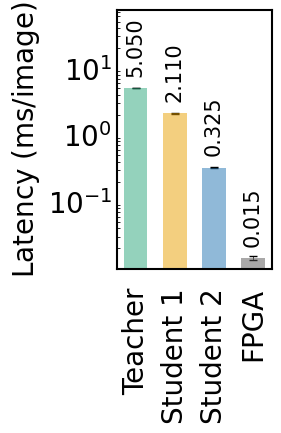

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for inference speed
models = ['Teacher', 'Student 1', 'Student 2', 'FPGA']
inference_speed = [5.05, 2.11, 0.325, 0.0145]  # Latency in ms/image
inference_speed_std = [0.06, 0.03, 0.004, 0.001]  # Standard deviation


# Plot settings
font_size = 20
font = {'size': font_size}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 1.50

# Colors for the bars
colors3 = ['#2ba77b', '#e9a001', '#2274b2', '#545253']

# Width of the bars
bar_width = 0.6

# Create the plot
fig, ax = plt.subplots(figsize=(2, 3.5), dpi=100)

# Positions of the bars on the x-axis
x_positions = np.arange(len(models))

# Plot the bars
bars = ax.bar(
    x_positions,
    inference_speed,
    align='center',
    alpha=0.5,
    edgecolor='none',
    linewidth=0,
    width=bar_width,
    color=colors3,
    zorder=1  # Set bars zorder
)

# Plot the error bars separately
ax.errorbar(
    x_positions,
    inference_speed,
    yerr=inference_speed_std,
    fmt='none',
    ecolor='black',
    elinewidth=0.5,
    capsize=3,
    zorder=0  # Ensure error bars are behind bars
)

# Add text labels on top of each bar
for i, (x, y) in enumerate(zip(x_positions, inference_speed)):
    offset = 0.5 * y  # Dynamic offset based on bar height
    ax.text(
        x,
        y + offset,
        f"{inference_speed[i]:.3f}",
        ha='center',
        va='bottom',
        rotation=90,
        zorder=2,
        fontsize=15
    )

# Set x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(models, rotation=90)

# Customize tick parameters
ax.tick_params(axis='y', direction='in', which='both')  # Y-axis ticks inside
ax.tick_params(axis='both', length=10, width=0.0, color='gray')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Set y-axis label
ax.set_ylabel(r"Latency ($\mathrm{ms}/\mathrm{image}$)")


# Adjust y-axis limits to include text labels in logarithmic scale
max_bar_height = max(inference_speed)
max_error = max(inference_speed_std)
scaling_factor = 15  # Factor to scale the upper limit
ax.set_ylim(top=max_bar_height * scaling_factor)  # Scale the top limit multiplicatively



# Adjust layout to prevent cropping
plt.subplots_adjust(top=0.85)  # Adjust the top margin as needed

# Save the plot
image_name = "./inference_speed"
plt.savefig(image_name + '.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.savefig(image_name + '.png', format='png', dpi=1200, bbox_inches='tight')

# Show the plot
plt.show()
